The ellipse is given by 0.0799x^2 + 0.0399xy+0.13y^2+0.000461x+0.000338y = 1


/home/federico/.virtualenvs/metodos/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


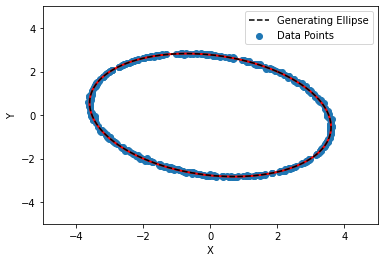

In [3]:
import numpy as np
import matplotlib.pyplot as plt
alpha = 5
beta = 3
N = 500
DIM = 2

np.random.seed(2)

# Generate random points on the unit circle by sampling uniform angles
theta = np.random.uniform(0, 2*np.pi, (N,1))
eps_noise = 0.02 * np.random.normal(size=[N,1])
circle = np.hstack([np.cos(theta), np.sin(theta)])

# Stretch and rotate circle to an ellipse with random linear tranformation
B = np.random.randint(-3, 3, (DIM, DIM))
noisy_ellipse = circle.dot(B) + eps_noise

# Extract x coords and y coords of the ellipse as column vectors
X = noisy_ellipse[:,0:1]
Y = noisy_ellipse[:,1:]

#X = X[1:6]
#Y = Y[1:6]

#X = X[1:11]
#Y = Y[1:11]

# Formulate and solve the least squares problem ||Ax - b ||^2
A = np.hstack([X**2, X * Y, Y**2, X, Y])
b = np.ones_like(X)
x = np.linalg.lstsq(A, b)[0].squeeze()

# Print the equation of the ellipse in standard form
print('The ellipse is given by {0:.3}x^2 + {1:.3}xy+{2:.3}y^2+{3:.3}x+{4:.3}y = 1'.format(x[0], x[1],x[2],x[3],x[4]))

# Plot the noisy data
plt.scatter(X, Y, label='Data Points')

# Plot the original ellipse from which the data was generated
phi = np.linspace(0, 2*np.pi, 1000).reshape((1000,1))
c = np.hstack([np.cos(phi), np.sin(phi)])
ground_truth_ellipse = c.dot(B)
plt.plot(ground_truth_ellipse[:,0], ground_truth_ellipse[:,1], 'k--', label='Generating Ellipse')

# Plot the least squares ellipse
x_coord = np.linspace(-5,5,300)
y_coord = np.linspace(-5,5,300)
X_coord, Y_coord = np.meshgrid(x_coord, y_coord)
Z_coord = x[0] * X_coord ** 2 + x[1] * X_coord * Y_coord + x[2] * Y_coord**2 + x[3] * X_coord + x[4] * Y_coord
plt.contour(X_coord, Y_coord, Z_coord, levels=[1], colors=('r'), linewidths=2)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()